<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-I/blob/main/ACEPTACION_RECHAZO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\textbf{METODO DE ACEPTACION Y RECHAZO}$
Este método consiste primeramente en generar un valor de la variable aleatoria y en seguida probar que dicho valor simulado proviene de la distribución de probabilidad que se está analizando.

Supongamos que $f(x)$ es una distribución de probabilidad acotada y con rango finito, es decir, $a \leq x \leq b$.

De acuerdo a esta función de probabilidad, la aplicación del método de rechazo implica el desarrollo de los siguientes pasos:
1. Generar dos números uniformes $R_1$ y $R_2$.
2. Determinar el valor de la variable aleatoria $x$ de acuerdo a la siguiente relación lineal de $R_1$ :
$$
x=a+(b-a) R_1
$$
3. Evaluar la función de probabilidad en $x=a+(b-a) R_1$.
4. Determinar si la siguiente desigualdad se cumple:
$$
R_2 \leq f\left(a+(b-a) R_1\right) / M
$$

Se utiliza a $x=a+(b-a) R_1$ si la respuesta es afirmativa como un valor simulado de la variable aleatoria. De lo contrario, es necesario pasar nuevamente al paso 1 tantas veces como sea necesario.

La teoria sobre la que se apoya este método se basa en el hecho de que la probabilidad de que $R_2 \leq f(x) / M$ es exactamente $f(x) / M$. Por consiguiente, si un número es escogido al azar de acuerdo a $x=a+(b-a) R_1 \mathrm{y}$

Para este ejemplos usemos
$$
f(x) = 20x(1-x)^2 \ , \ 0 <x<1
$$

Para este caso podemos utilizar
$$
g(x) = 1, 0 < x < 1
$$
la cual es la función correspondiente a una distribución uniforme(0,1)
Podemos notar que:
$$
 \frac{f(x)}{g(x)} = 20x(1-x)^2
$$
Buscamos calcular el máximo con el criterio de la derivada
$$
\frac{d(20x(1-x)^3}{dx} = 20(x \frac{d((1-x)^2)}{dx} + (1-x)^2 \frac{x}{dx})
$$
$$
= 20(-3x(1-x)^2 + (1-x)^3) = 0 → x = \frac{1}{4}
$$
Dado que c es el valor máximo:
$$
C = 20(\frac{1}{4})(\frac{3}{4})^3 = \frac{135}{64}
$$


$\textbf{PSEUDOGCODIGO}$
1. Generamos Y con desidad g.
2. Generamos un número aleatorio
3. Si $ u \leq \frac{f(y)}{cg(y)}$

    Hacemos x = y

   En caso contrario, regresamos al paso 1.

In [8]:
import random as rnd
import numpy as np #Esta libreria incluye algunas funciones matematicas. No necesitamos math
import matplotlib.pyplot as plt

In [9]:
def f(x):
  return 20*x*(1-x)**3

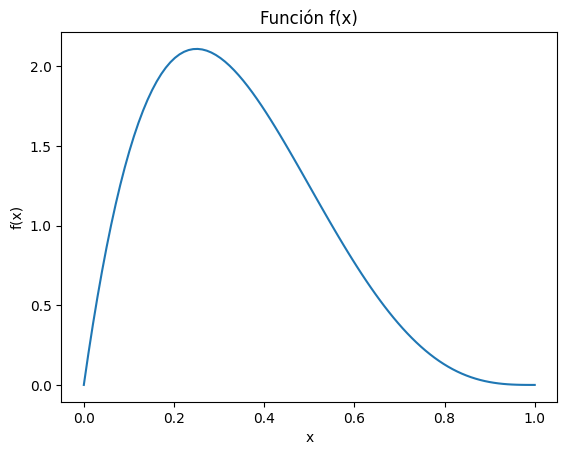

In [10]:
x = np.linspace(0, 1, 100)
y = f(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función f(x)')
plt.show()

In [11]:
def g(x):
    return 1  # Uniforme en [0, 1]

In [23]:
def aceptacion(n):
  C = 135/64
  Lista = []
  for i in range(n):
    #Generamos una uniforme
    u = rnd.random() #Genera números aleatorios entre 0 y 1
    y = rnd.random() #Generar la variable y con la distribución de g.
    if (u <= f(y)/(C*g(y))):
      x = y
    Lista.append(x)#Agregamos los elementos a una lista
  return Lista

In [24]:
G = aceptacion(1000000)

In [25]:
mu = np.mean(G)
print(mu)
sigma = np.var(G)
print(sigma)

0.33291500252222145
0.03178506446854101


$\textbf{HISTOGRAMA DE LOS NUMEROS ALEATORIOS}$
Notese que sigue una distribución uniforme

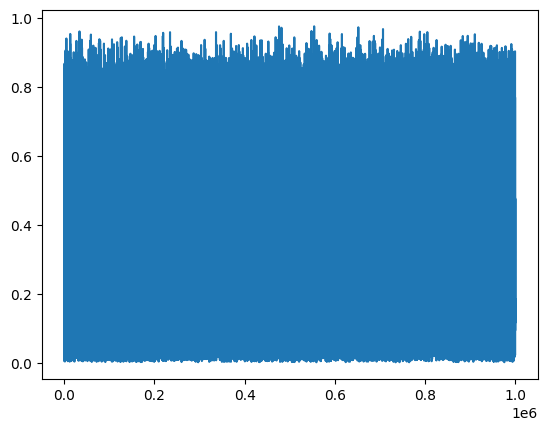

In [26]:
plt.plot(G)

$\textbf{HISTOGRAMA DE LA MUESTRA GENERADA}$

(array([3.5800e+02, 8.4900e+02, 1.2550e+03, 1.5780e+03, 1.9590e+03,
        2.5270e+03, 2.9880e+03, 3.3040e+03, 3.6100e+03, 4.0080e+03,
        4.4660e+03, 4.8260e+03, 5.0440e+03, 5.1480e+03, 5.4250e+03,
        5.6920e+03, 6.0070e+03, 6.4440e+03, 6.7790e+03, 6.6940e+03,
        7.2390e+03, 7.2970e+03, 7.8420e+03, 8.0150e+03, 8.2460e+03,
        8.5900e+03, 8.4370e+03, 8.5690e+03, 8.5080e+03, 8.7350e+03,
        9.3250e+03, 9.4300e+03, 9.4330e+03, 9.3790e+03, 9.2730e+03,
        9.4780e+03, 9.6110e+03, 9.6320e+03, 9.7810e+03, 9.8140e+03,
        1.0042e+04, 1.0057e+04, 1.0107e+04, 1.0196e+04, 1.0346e+04,
        9.9730e+03, 9.8990e+03, 1.0334e+04, 1.0254e+04, 1.0405e+04,
        1.0217e+04, 1.0484e+04, 1.0261e+04, 1.0055e+04, 1.0506e+04,
        1.0174e+04, 1.0074e+04, 1.0118e+04, 1.0263e+04, 1.0108e+04,
        1.0000e+04, 9.9240e+03, 1.0304e+04, 1.0017e+04, 9.6050e+03,
        9.6380e+03, 1.0023e+04, 9.5330e+03, 9.6140e+03, 9.3630e+03,
        9.7900e+03, 9.6030e+03, 9.1440e+03, 9.49

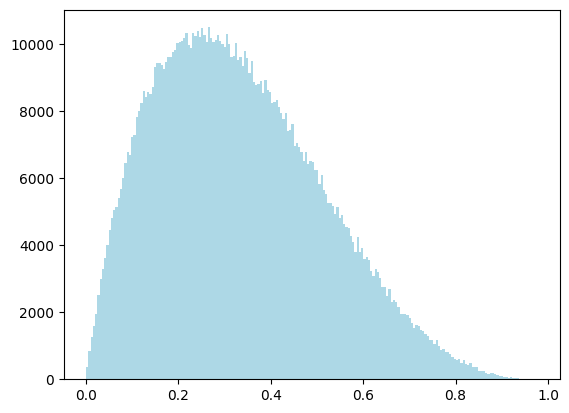

In [27]:
plt.hist(G,bins = 200, color = "lightblue")

$\textbf{FUNCION ACUMULATIVA}$

In [28]:
def cdf(muestra):
   n = len(muestra)
   x = np.sort(muestra)
   y = np.arange(0,n)/n
   return x,y

In [29]:
x,y = cdf(G)

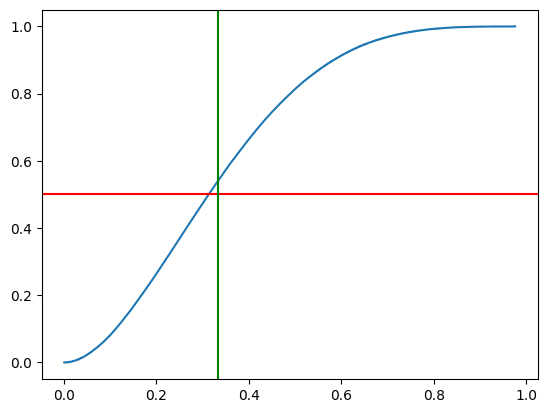

In [30]:
plt.step(x,y)
plt.axhline(0.5, color="red")
plt.axvline(np.mean(G),color = "green")